In [4]:
import wget
import zipfile

url = 'https://www.kaggle.com/api/v1/datasets/download/neelagiriaditya/ufc-datasets-1994-2025'
wget.download(url, '../data.zip')

with zipfile.ZipFile('../data.zip', 'r') as zip_ref:
  zip_ref.extractall('../data')

In [2]:
import pandas as pd

csv_file = pd.read_csv('../data/fight_details.csv')

In [16]:
csv_file.head()

,event_name,event_id,fight_id,r_name,r_id,b_name,b_id,division,title_fight,method,...,b_clinch_acc,b_ground_landed,b_ground_atmpted,b_ground_acc,b_landed_head_per,b_landed_body_per,b_landed_leg_per,b_landed_dist_per,b_landed_clinch_per,b_landed_ground_per
0,UFC Fight Night: Imavov vs. Borralho,6e380a4d73ab4f0e,d14fea43712707f0,Benoit Saint Denis,c2299ec916bc7c56,Mauricio Ruffy,9c393e836a852f30,lightweight,0,Submission,...,NaN,0.0,0.0,NaN,80.0,20.0,0.0,100.0,0.0,0.0
1,UFC Fight Night: Imavov vs. Borralho,6e380a4d73ab4f0e,5bcd8abf6da01dae,Nassourdine Imavov,881bf86d4cba8578,Caio Borralho,4126a78111c0855a,middleweight,0,Decision - Unanimous,...,100.0,0.0,0.0,NaN,59.0,21.0,19.0,89.0,10.0,0.0
2,UFC Fight Night: Imavov vs. Borralho,6e380a4d73ab4f0e,0149e875b31e57f8,Modestas Bukauskas,476fe566d2df676e,Paul Craig,eabf206b162b3b83,light heavyweight,0,KO/TKO,...,100.0,0.0,0.0,NaN,0.0,33.0,66.0,83.0,16.0,0.0
3,UFC Fight Night: Imavov vs. Borralho,6e380a4d73ab4f0e,69b31593175f77ec,Bolaji Oki,4bdedbdeedff7d1d,Mason Jones,f6ad6a1e4d600e0d,lightweight,0,KO/TKO,...,67.0,32.0,49.0,65.0,91.0,3.0,5.0,40.0,3.0,56.0
4,UFC Fight Night: Imavov vs. Borralho,6e380a4d73ab4f0e,a47123ae6e048f11,Axel Sola,1d2d98ddd05b38fb,Rhys McKee,f748267c4ab6c127,welterweight,0,KO/TKO,...,53.0,0.0,0.0,NaN,81.0,18.0,0.0,69.0,30.0,0.0


In [5]:
events_file = pd.read_csv('../data/event_details.csv')

fighter = 'Manel Kape'

df_fighter = pd.concat([
    csv_file.loc[csv_file["r_name"] == fighter, ["fight_id", "b_name", "r_sig_str_acc", "total_rounds"]].rename(columns={"r_id": "id", "b_name": "vs", "r_sig_str_acc": "sig_str_acc"}),
    csv_file.loc[csv_file["b_name"] == fighter, ["fight_id", "r_name", "b_sig_str_acc", "total_rounds"]].rename(columns={"b_id": "id", "r_name": "vs", "b_sig_str_acc": "sig_str_acc"})
], ignore_index=True)

fighter_strk_atmptd_stats = pd.merge(
  events_file[['fight_id', 'location', 'date', 'winner']],
  df_fighter[['fight_id', 'vs', 'sig_str_acc', 'total_rounds']],
  on="fight_id",
  how="inner"
)
fighter_strk_atmptd_stats['date'] = pd.to_datetime(fighter_strk_atmptd_stats.loc[:, 'date'])

fighter_strk_atmptd_stats

,fight_id,location,date,winner,vs,sig_str_acc,total_rounds
0,9d8a37f130db13e5,"Las Vegas, Nevada, USA",2025-03-01,Manel Kape,Asu Almabayev,53.0,5.0
1,1a635a5e4551e7d5,"Tampa, Florida, USA",2024-12-14,Manel Kape,Bruno Silva,66.0,3.0
2,d6e240c47ba6034d,"Manchester, England, United Kingdom",2024-07-27,Muhammad Mokaev,Muhammad Mokaev,41.0,3.0
3,222bb2c67a87d312,"Sydney, New South Wales, Australia",2023-09-09,Manel Kape,Felipe dos Santos,61.0,3.0
4,f87a7812733f7e8f,"Las Vegas, Nevada, USA",2022-12-17,Manel Kape,David Dvorak,48.0,3.0
5,376dddfa82debbf4,"Las Vegas, Nevada, USA",2021-12-04,Manel Kape,Zhalgas Zhumagulov,73.0,3.0
6,85c5dd604d5b3634,"Houston, Texas, USA",2021-08-07,Manel Kape,Ode Osbourne,65.0,3.0
7,01f262b68a6a2223,"Las Vegas, Nevada, USA",2021-03-13,Matheus Nicolau,Matheus Nicolau,40.0,3.0
8,2c81668d1459991f,"Las Vegas, Nevada, USA",2021-02-06,Alexandre Pantoja,Alexandre Pantoja,53.0,3.0


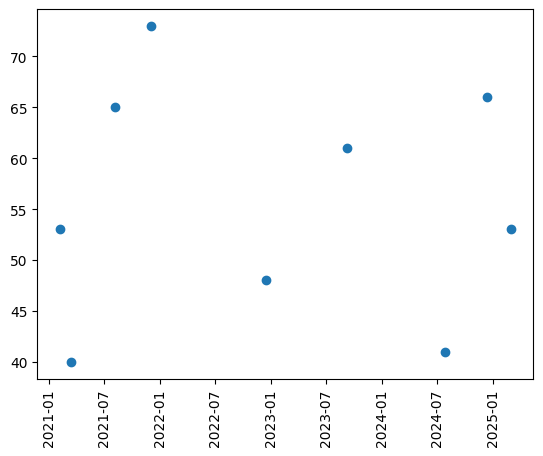

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.xticks(rotation=90)
_ = ax.scatter(fighter_strk_atmptd_stats['date'], fighter_strk_atmptd_stats['sig_str_acc'])